Task:

Predict the price of a house based on its characteristics

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Load dataframe
dataframe = pd.read_csv("housing.csv")
dataframe

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND


In [3]:
# One Hot Encode Ocean Proximity Column
ocean_proximity_dummies = pd.get_dummies(dataframe.ocean_proximity, prefix='ocean_proximity', prefix_sep='.', dtype=int)
dataframe = pd.concat([dataframe, ocean_proximity_dummies], axis=1)
dataframe.drop(['ocean_proximity'], axis=1, inplace=True)

In [4]:
# Fill total_bedrooms na with its mean
dataframe['total_bedrooms'].fillna(dataframe['total_bedrooms'].median(), inplace=True)

C:\Users\Dagher\AppData\Local\Temp\ipykernel_7452\217105050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataframe['total_bedrooms'].fillna(dataframe['total_bedrooms'].median(), inplace=True)


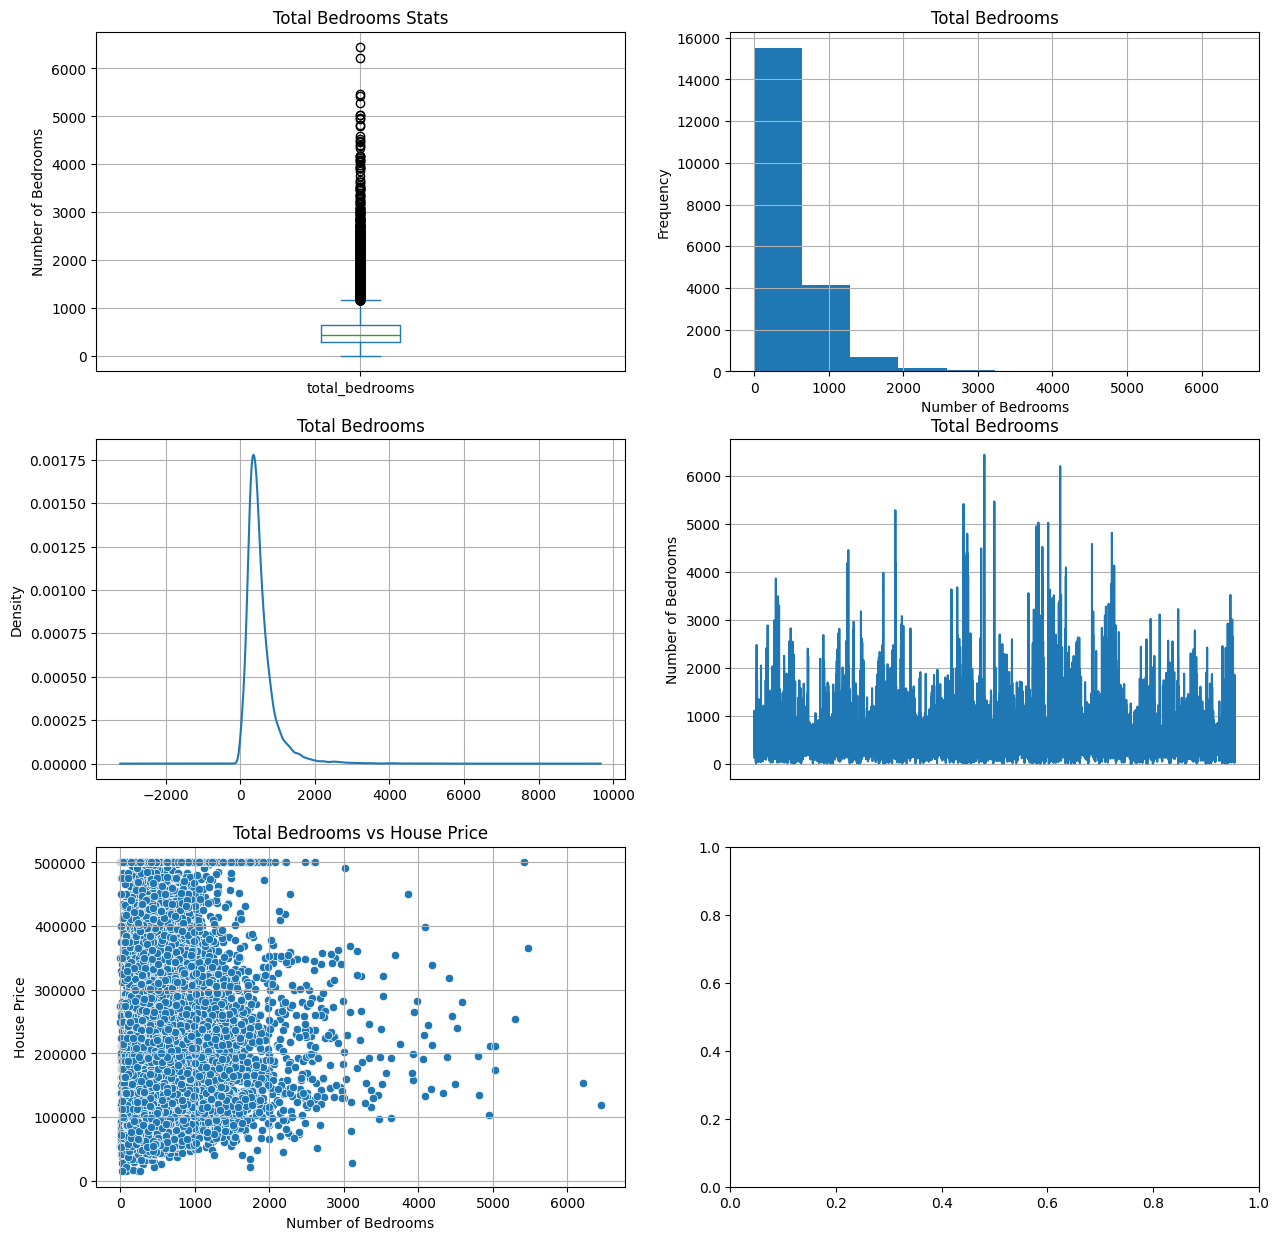

In [5]:
# Visualize total_bedrooms
fig, (ax1,ax2, ax3) = plt.subplots(3,2, figsize=(15,15))

dataframe['total_bedrooms'].plot(kind='box', ax=ax1[0], ylabel='Number of Bedrooms', title='Total Bedrooms Stats', grid=True) # Boxplot
dataframe['total_bedrooms'].plot(kind='hist', ax=ax1[1], xlabel='Number of Bedrooms', title='Total Bedrooms', grid=True) # Histogram
dataframe['total_bedrooms'].plot(kind='density', ax=ax2[0], xlabel='Number of Bedrooms', title='Total Bedrooms', grid=True) # Density curve
dataframe['total_bedrooms'].plot(kind='line', ax=ax2[1], xticks=[], ylabel='Number of Bedrooms', title='Total Bedrooms', grid=True) # Line curve

scatterplot = sb.scatterplot(data=dataframe, x='total_bedrooms', y='median_house_value', ax=ax3[0]) # Scatterplot
scatterplot.set_xlabel('Number of Bedrooms')
scatterplot.set_ylabel('House Price')
scatterplot.grid(True)
scatterplot.set_title('Total Bedrooms vs House Price')

plt.show()

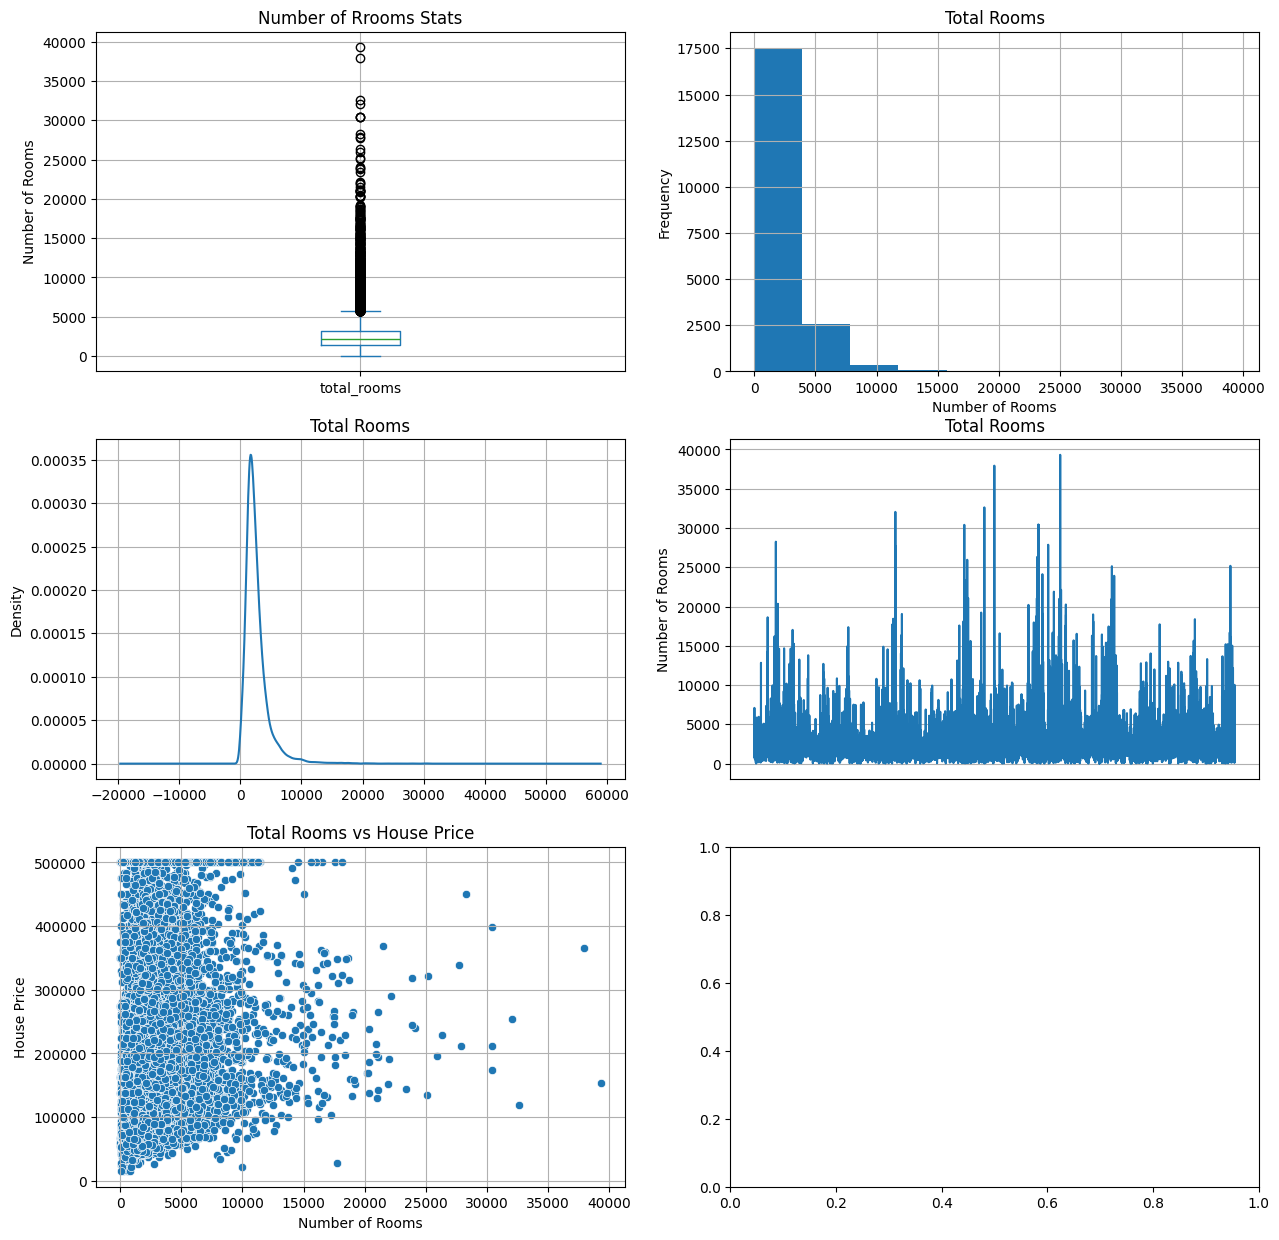

In [6]:
# Visualize total_rooms
fig, (ax1,ax2,ax3) = plt.subplots(3,2, figsize=(15,15))

dataframe['total_rooms'].plot(kind='box', ax=ax1[0], ylabel='Number of Rooms', title='Number of Rrooms Stats', grid=True) # Boxplot
dataframe['total_rooms'].plot(kind='hist', ax=ax1[1], xlabel='Number of Rooms', title='Total Rooms', grid=True) # Histogram
dataframe['total_rooms'].plot(kind='density', ax=ax2[0], xlabel='Number of Rooms', title='Total Rooms', grid=True) # Density curve
dataframe['total_rooms'].plot(kind='line', ax=ax2[1], xticks=[], ylabel='Number of Rooms', title='Total Rooms', grid=True)

scatterplot = sb.scatterplot(data=dataframe, x='total_rooms', y='median_house_value', ax=ax3[0]) # Scatterplot
scatterplot.set_xlabel('Number of Rooms')
scatterplot.set_ylabel('House Price')
scatterplot.grid(True)
scatterplot.set_title('Total Rooms vs House Price')

plt.show()

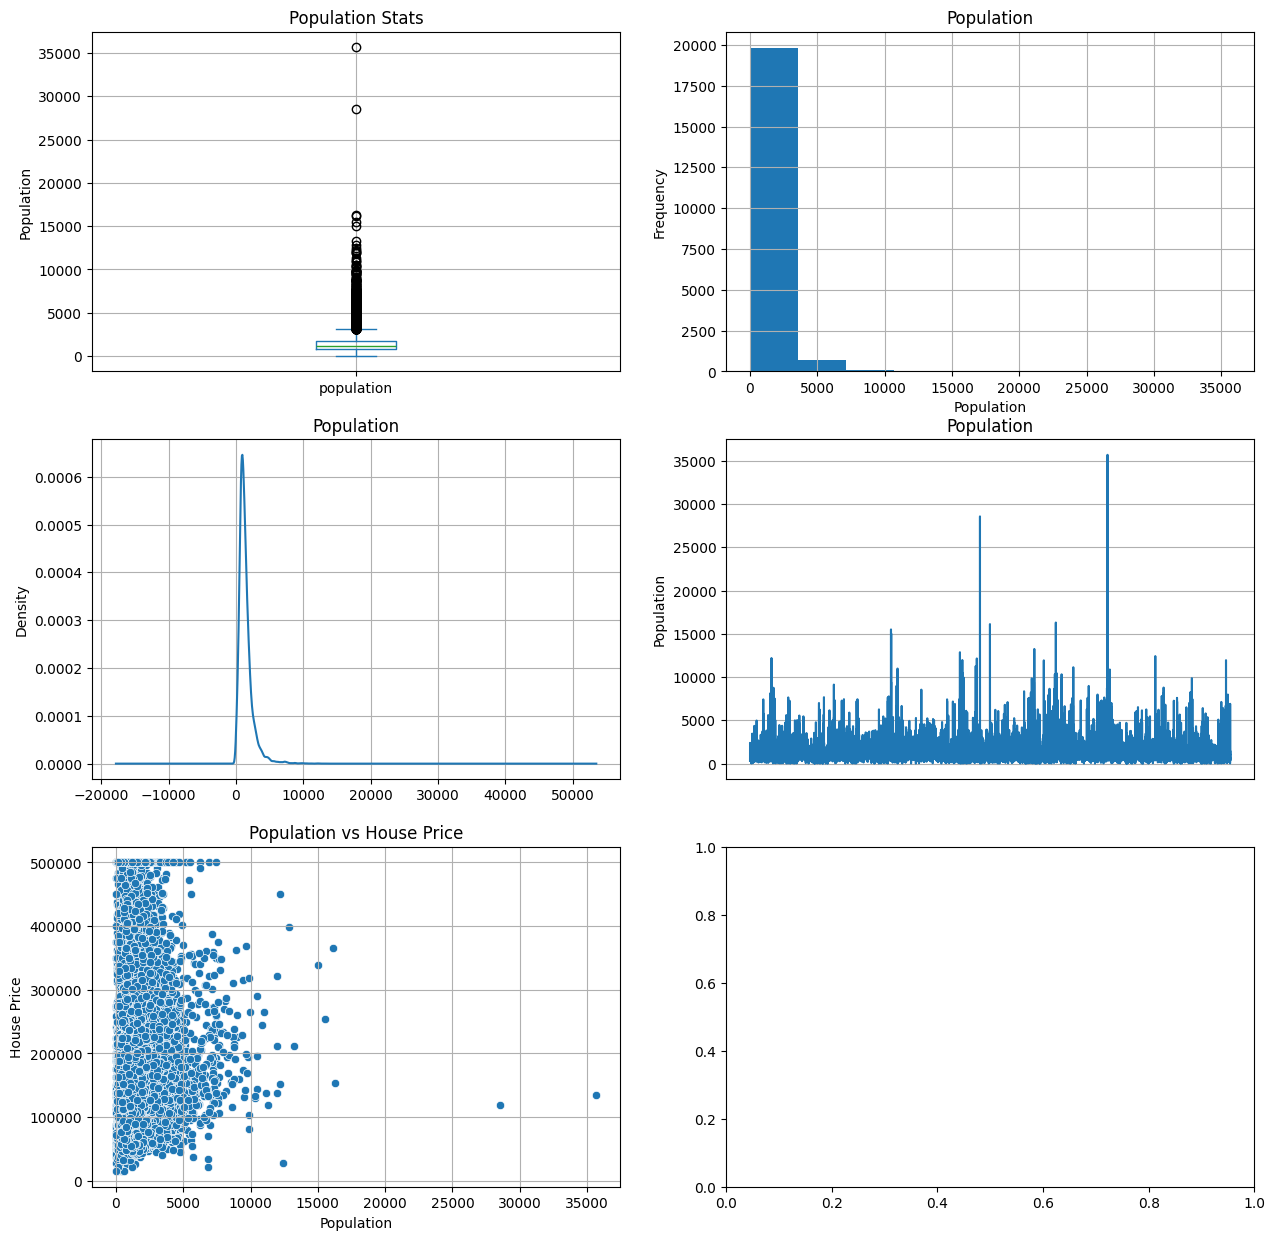

In [7]:
# Visualize population
fig, (ax1,ax2,ax3) = plt.subplots(3,2, figsize=(15,15))

dataframe['population'].plot(kind='box', ax=ax1[0], ylabel='Population', title='Population Stats', grid=True) # Boxplot
dataframe['population'].plot(kind='hist', ax=ax1[1], xlabel='Population', title='Population', grid=True) # Histogram
dataframe['population'].plot(kind='density', ax=ax2[0], xlabel='Population', title='Population', grid=True) # Density curve
dataframe['population'].plot(kind='line', ax=ax2[1], xticks=[], ylabel='Population', title='Population', grid=True) # Line curve

scatterplot = sb.scatterplot(data=dataframe, x='population', y='median_house_value', ax=ax3[0]) # Scatterplot
scatterplot.set_xlabel('Population')
scatterplot.set_ylabel('House Price')
scatterplot.grid(True)
scatterplot.set_title('Population vs House Price')
plt.show()

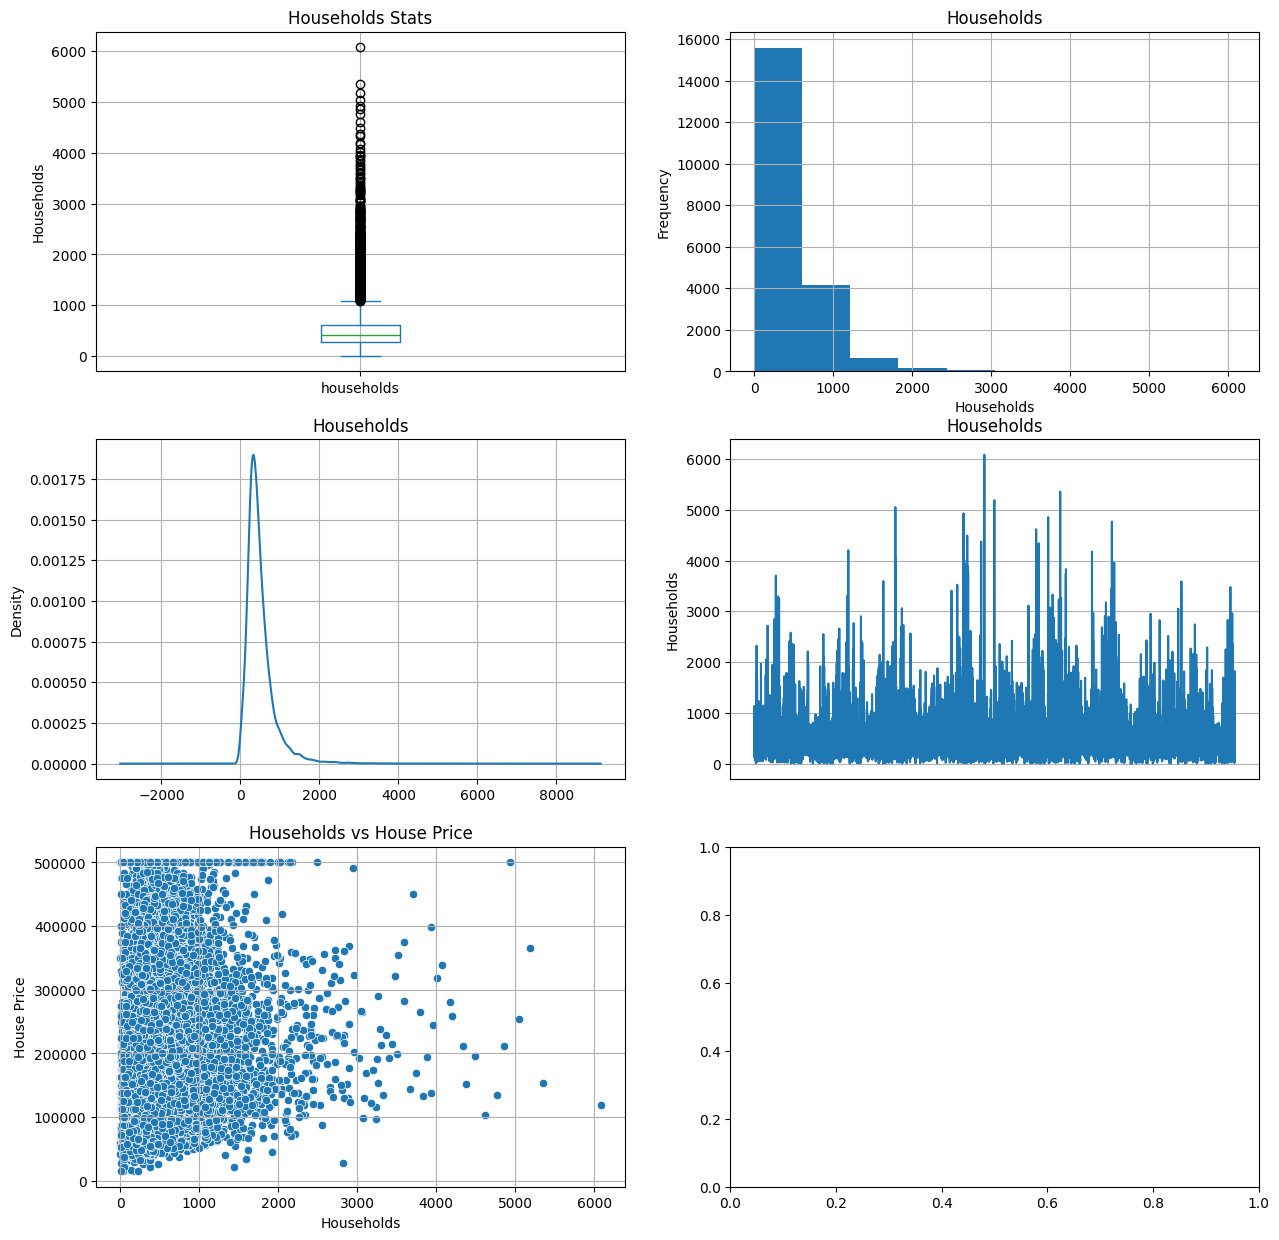

In [8]:
# Visualize housholds
fig, (ax1,ax2,ax3) = plt.subplots(3,2, figsize=(15,15))

dataframe['households'].plot(kind='box', ax=ax1[0], ylabel='Households', title='Households Stats', grid=True) # Boxplot
dataframe['households'].plot(kind='hist', ax=ax1[1], xlabel='Households', title='Households', grid=True) # Histogram
dataframe['households'].plot(kind='density', ax=ax2[0], xlabel='Households', title='Households', grid=True) # Density curve
dataframe['households'].plot(kind='line', ax=ax2[1], xticks=[], ylabel='Households', title='Households', grid=True) # Line curve

scatterplot = sb.scatterplot(data=dataframe, x='households', y='median_house_value', ax=ax3[0]) # Scatterplot
scatterplot.set_xlabel('Households')
scatterplot.set_ylabel('House Price')
scatterplot.grid(True)
scatterplot.set_title('Households vs House Price')
plt.show()

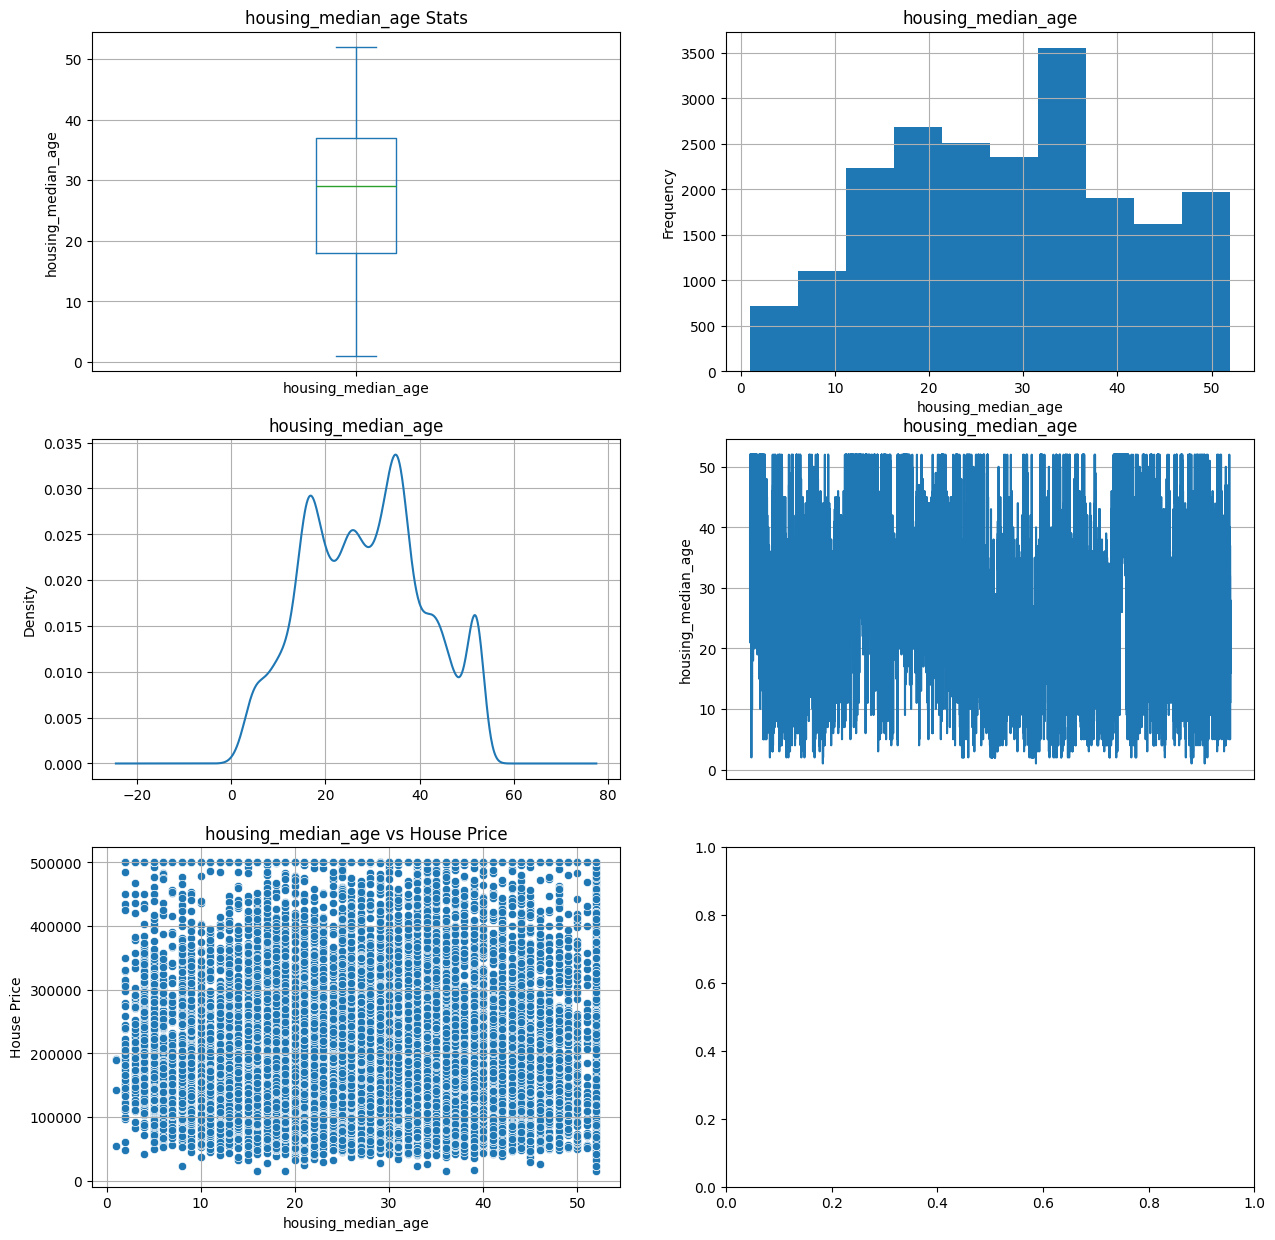

In [9]:
# Visualize housing_median_age
fig, (ax1,ax2,ax3) = plt.subplots(3,2, figsize=(15,15))

dataframe['housing_median_age'].plot(kind='box', ax=ax1[0], ylabel='housing_median_age', title='housing_median_age Stats', grid=True) # Boxplot
dataframe['housing_median_age'].plot(kind='hist', ax=ax1[1], xlabel='housing_median_age', title='housing_median_age', grid=True) # Histogram
dataframe['housing_median_age'].plot(kind='density', ax=ax2[0], xlabel='housing_median_age', title='housing_median_age', grid=True) # Density curve
dataframe['housing_median_age'].plot(kind='line', ax=ax2[1], xticks=[], ylabel='housing_median_age', title='housing_median_age', grid=True) # Line curve

scatterplot = sb.scatterplot(data=dataframe, x='housing_median_age', y='median_house_value', ax=ax3[0]) # Scatterplot
scatterplot.set_xlabel('housing_median_age')
scatterplot.set_ylabel('House Price')
scatterplot.grid(True)
scatterplot.set_title('housing_median_age vs House Price')
plt.show()

Averagre Price of house with ocean_proximity.ISLAND: 380440.0
Averagre Price of house with ocean_proximity.NEAR BAY: 259212.31179039303
Averagre Price of house with ocean_proximity.NEAR OCEAN: 249433.97742663656
Averagre Price of house with ocean_proximity.<1H OCEAN: 240084.28546409807
Averagre Price of house with ocean_proximity.INLAND: 124805.39200122119


<Axes: xlabel='Location'>

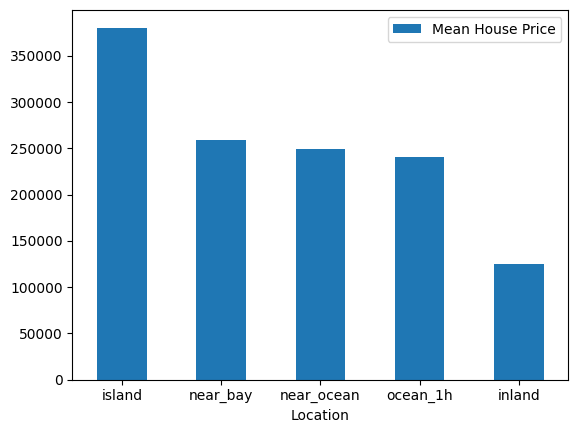

In [10]:
# Check the average cost of house based on its location
island = dataframe[dataframe['ocean_proximity.ISLAND'] == 1]['median_house_value'].mean()
near_bay = dataframe[dataframe['ocean_proximity.NEAR BAY'] == 1]['median_house_value'].mean()
near_ocean = dataframe[dataframe['ocean_proximity.NEAR OCEAN'] == 1]['median_house_value'].mean()
ocean_1h = dataframe[dataframe["ocean_proximity.<1H OCEAN"] == 1]['median_house_value'].mean()
inland = dataframe[dataframe["ocean_proximity.INLAND"] == 1]['median_house_value'].mean()

print(f'Averagre Price of house with ocean_proximity.ISLAND: {island}')
print(f'Averagre Price of house with ocean_proximity.NEAR BAY: {near_bay}')
print(f'Averagre Price of house with ocean_proximity.NEAR OCEAN: {near_ocean}')
print(f'Averagre Price of house with ocean_proximity.<1H OCEAN: {ocean_1h}')
print(f'Averagre Price of house with ocean_proximity.INLAND: {inland}')

mean_df = pd.DataFrame({
  'Location': ['island', 'near_bay', 'near_ocean', 'ocean_1h', 'inland'],
   'Mean House Price': [island, near_bay, near_ocean, ocean_1h, inland]
  }).set_index('Location')

mean_df.plot(kind='bar', rot=0)

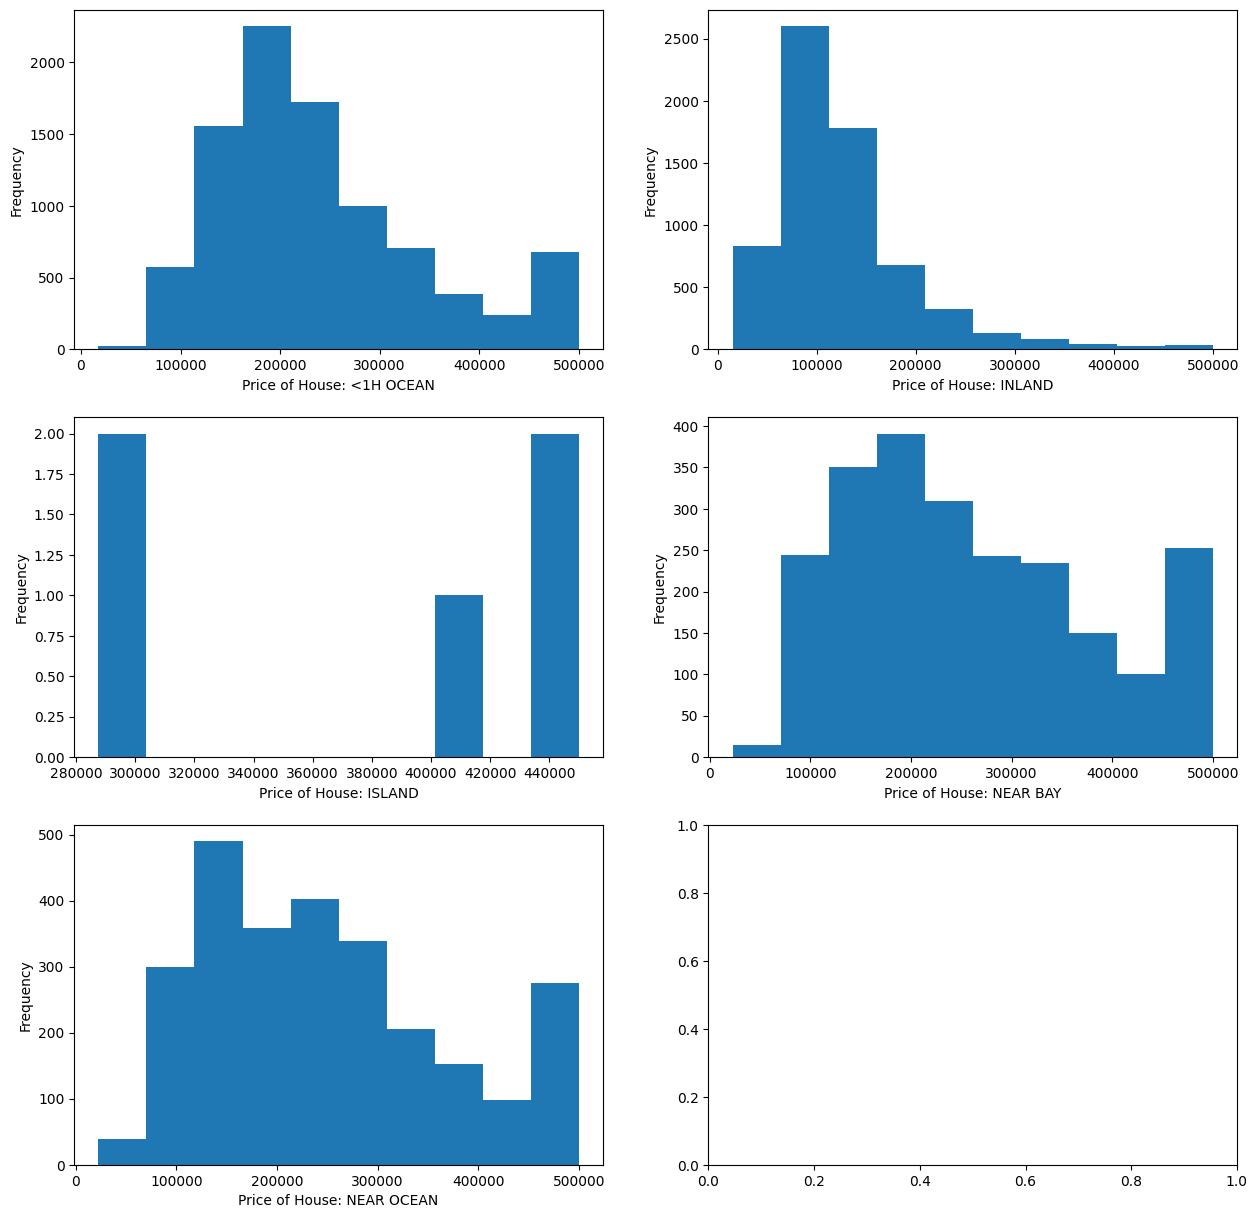

In [11]:
# Visualize distribution of cost of house based on location
fig, (ax1,ax2,ax3) = plt.subplots(3,2, figsize=(15,15))

dataframe[dataframe['ocean_proximity.<1H OCEAN'] == 1]['median_house_value'].plot(kind='hist', ax=ax1[0], xlabel='Price of House: <1H OCEAN')
dataframe[dataframe['ocean_proximity.INLAND'] == 1]['median_house_value'].plot(kind='hist', ax=ax1[1], xlabel='Price of House: INLAND')
dataframe[dataframe['ocean_proximity.ISLAND'] == 1]['median_house_value'].plot(kind='hist', ax=ax2[0], xlabel='Price of House: ISLAND')
dataframe[dataframe['ocean_proximity.NEAR BAY'] == 1]['median_house_value'].plot(kind='hist', ax=ax2[1], xlabel='Price of House: NEAR BAY')
dataframe[dataframe['ocean_proximity.NEAR OCEAN'] == 1]['median_house_value'].plot(kind='hist', ax=ax3[0], xlabel='Price of House: NEAR OCEAN')
plt.show()


In [12]:
# Separate the Data
features = dataframe.drop(["median_house_value"], axis = 1)
label = dataframe["median_house_value"]

In [13]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.3)

# Apply feature scaling
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform( X_train )
X_test = feature_scaler.transform( X_test )

print(f"Length of X_train: {len(X_train)}, Length of y_train: {len(y_train)}, Length of X_test: {len(X_test)}, Length of y_test: {len(y_test)}")

Length of X_train: 14448, Length of y_train: 14448, Length of X_test: 6192, Length of y_test: 6192


In [14]:
### Testing Reression on Decision Tree and Random Forest Models Individually

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [15]:
# Build Decision Tree
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit( X_train, y_train )
tree_prediction = tree.predict( X_test )
tree_mae = mean_absolute_error(y_test, tree_prediction) 
tree_r2 = r2_score(y_test, tree_prediction) 
tree_cross_val_score = cross_val_score(estimator=tree, X=X_test, y=y_test, cv=10)

In [16]:
# Build Random Forest
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( n_estimators = 100)
forest.fit( X_train, y_train )
forest_prediction = forest.predict( X_test )
forest_mae = mean_absolute_error(y_test, forest_prediction)
forest_r2 = r2_score(y_test, forest_prediction)
forest_cross_val_score = cross_val_score(estimator=forest, X=X_test, y=y_test, cv=10)

In [17]:
### Evaluate Models
print(f"Decision Tree Regression mae: {tree_mae:.2f}, cvs: {tree_cross_val_score.mean():.2f}, r2_score: {tree_r2:.2f}\n")
print(f"Random Forest Regression mae: {forest_mae:.2f}, cvs: {forest_cross_val_score.mean():.2f}, r2_score: {forest_r2:.2f}\n")

Decision Tree Regression mae: 43920.98, cvs: 0.60, r2_score: 0.64

Random Forest Regression mae: 32228.61, cvs: 0.78, r2_score: 0.82



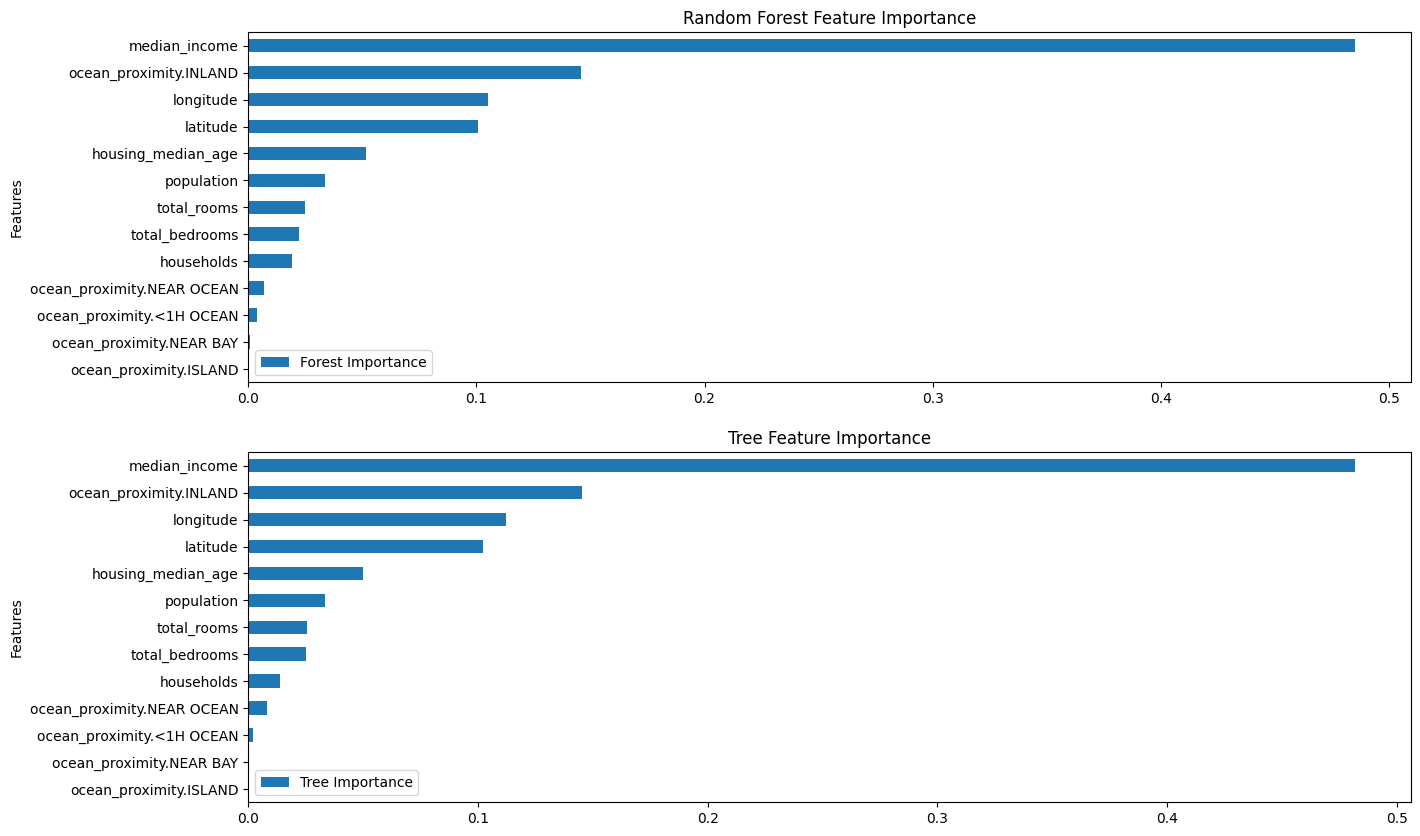

In [18]:
# random forest and tree feature importance
feature_importance = pd.DataFrame({
  'Features': features.columns,
  'Forest Importance': forest.feature_importances_, 
  'Tree Importance': tree.feature_importances_ })

feature_importance = feature_importance.sort_values('Forest Importance', ascending=True)

fig, ax = plt.subplots(2,1,figsize=(15,10))
feature_importance.plot(kind='barh', x='Features', y='Forest Importance', title='Random Forest Feature Importance', ax=ax[0])
feature_importance.plot(kind='barh', x='Features', y='Tree Importance', title='Tree Feature Importance', ax=ax[1])

plt.show()